## 合并数据

In [1]:
import pandas as pd
import numpy as np

#### 表堆叠

In [2]:
dict1 = {'ID':[1,2,3,4,5,6,7,8,9],
         'System':['win10','win10',np.nan,'win10',
                np.nan,np.nan,'win7','win7','win8'],
      'cpu':['i7','i5',np.nan,'i7',np.nan,np.nan,'i5','i5','i3']}

dict2 = {'ID':[1,2,3,4,5,6,7,8,9],
         'System':[np.nan, np.nan,'win7',np.nan,
                'win8','win7',np.nan,np.nan,np.nan],
        'cpu':[np.nan,np.nan,'i3',np.nan,'i7',
                'i5',np.nan,np.nan,np.nan]}
df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)

print(df1)
print(df2)

   ID System  cpu
0   1  win10   i7
1   2  win10   i5
2   3    NaN  NaN
3   4  win10   i7
4   5    NaN  NaN
5   6    NaN  NaN
6   7   win7   i5
7   8   win7   i5
8   9   win8   i3
   ID System  cpu
0   1    NaN  NaN
1   2    NaN  NaN
2   3   win7   i3
3   4    NaN  NaN
4   5   win8   i7
5   6   win7   i5
6   7    NaN  NaN
7   8    NaN  NaN
8   9    NaN  NaN


In [3]:
# 横向表堆叠
pd.concat([df1, df2], axis=1)

,ID,System,cpu,ID,System,cpu
0,1,win10,i7,1,NaN,NaN
1,2,win10,i5,2,NaN,NaN
2,3,NaN,NaN,3,win7,i3
3,4,win10,i7,4,NaN,NaN
4,5,NaN,NaN,5,win8,i7
5,6,NaN,NaN,6,win7,i5
6,7,win7,i5,7,NaN,NaN
7,8,win7,i5,8,NaN,NaN
8,9,win8,i3,9,NaN,NaN


In [4]:
df1['tmp'] = 4    # 为df1新增一列数据
df1

,ID,System,cpu,tmp
0,1,win10,i7,4
1,2,win10,i5,4
2,3,NaN,NaN,4
3,4,win10,i7,4
4,5,NaN,NaN,4
5,6,NaN,NaN,4
6,7,win7,i5,4
7,8,win7,i5,4
8,9,win8,i3,4


In [5]:
# 纵向表堆叠
print(pd.concat([df1, df2], join='outer'))    # 拼接时取两张表的并集
print(pd.concat([df1, df2], join='inner'))    # 拼接时取两张表的交集
print(df1.append(df2))

   ID System  cpu  tmp
0   1  win10   i7  4.0
1   2  win10   i5  4.0
2   3    NaN  NaN  4.0
3   4  win10   i7  4.0
4   5    NaN  NaN  4.0
5   6    NaN  NaN  4.0
6   7   win7   i5  4.0
7   8   win7   i5  4.0
8   9   win8   i3  4.0
0   1    NaN  NaN  NaN
1   2    NaN  NaN  NaN
2   3   win7   i3  NaN
3   4    NaN  NaN  NaN
4   5   win8   i7  NaN
5   6   win7   i5  NaN
6   7    NaN  NaN  NaN
7   8    NaN  NaN  NaN
8   9    NaN  NaN  NaN
   ID System  cpu
0   1  win10   i7
1   2  win10   i5
2   3    NaN  NaN
3   4  win10   i7
4   5    NaN  NaN
5   6    NaN  NaN
6   7   win7   i5
7   8   win7   i5
8   9   win8   i3
0   1    NaN  NaN
1   2    NaN  NaN
2   3   win7   i3
3   4    NaN  NaN
4   5   win8   i7
5   6   win7   i5
6   7    NaN  NaN
7   8    NaN  NaN
8   9    NaN  NaN
   ID System  cpu  tmp
0   1  win10   i7  4.0
1   2  win10   i5  4.0
2   3    NaN  NaN  4.0
3   4  win10   i7  4.0
4   5    NaN  NaN  4.0
5   6    NaN  NaN  4.0
6   7   win7   i5  4.0
7   8   win7   i5  4.0
8   9   win8  

#### 主键合并

In [6]:
order_sample = pd.read_csv('data/order_sample.csv')
dishes_info = pd.read_csv('data/dishes_info.csv')
print(order_sample.head(3))
print(dishes_info.head(3))
print(order_sample.shape)
print(dishes_info.shape)

   detail_id  order_id  dishes_id     place_order_time
0       2956       417     610062  2016-08-01 11:05:36
1       2958       417     609957  2016-08-01 11:07:07
2       2961       417     609950  2016-08-01 11:07:40
   dishes_id        dishes_name  amounts
0     610062               蒜蓉生蚝       49
1     609957  蒙古烤羊腿\r\n\r\n\r\n       48
2     609950               大蒜苋菜       30
(2779, 4)
(146, 3)


In [7]:
pd.merge(order_sample, dishes_info, how='left', on='dishes_id')

,detail_id,order_id,dishes_id,place_order_time,dishes_name,amounts
0,2956,417,610062,2016-08-01 11:05:36,蒜蓉生蚝,49
1,2958,417,609957,2016-08-01 11:07:07,蒙古烤羊腿\r\n\r\n\r\n,48
2,2961,417,609950,2016-08-01 11:07:40,大蒜苋菜,30
3,2966,417,610038,2016-08-01 11:11:11,芝麻烤紫菜,25
4,2968,417,610003,2016-08-01 11:11:30,蒜香包,13
...,...,...,...,...,...,...
2774,6750,774,610011,2016-08-10 21:56:24,白饭/大碗,10
2775,6742,774,609996,2016-08-10 21:56:48,牛尾汤,40
2776,6756,774,609949,2016-08-10 22:01:52,意文柠檬汁,13
2777,6763,774,610014,2016-08-10 22:03:58,金玉良缘,30


#### 重叠合并

In [8]:
dict1 = {'ID':[1,2,3,4,5,6,7,8,9],
         'System':['win10','win10',np.nan,'win10',
                np.nan,np.nan,'win7','win7','win8'],
      'cpu':['i7','i5',np.nan,'i7',np.nan,np.nan,'i5','i5','i3']}

dict2 = {'ID':[1,2,3,4,5,6,7,8,9],
         'System':[np.nan, np.nan,'win7',np.nan,
                'win8','win7',np.nan,np.nan,np.nan],
        'cpu':[np.nan,np.nan,'i3',np.nan,'i7',
                'i5',np.nan,np.nan,np.nan]}
df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)

print(df1)
print(df2)
df1.combine_first(df2)

   ID System  cpu
0   1  win10   i7
1   2  win10   i5
2   3    NaN  NaN
3   4  win10   i7
4   5    NaN  NaN
5   6    NaN  NaN
6   7   win7   i5
7   8   win7   i5
8   9   win8   i3
   ID System  cpu
0   1    NaN  NaN
1   2    NaN  NaN
2   3   win7   i3
3   4    NaN  NaN
4   5   win8   i7
5   6   win7   i5
6   7    NaN  NaN
7   8    NaN  NaN
8   9    NaN  NaN


,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,win7,i3
3,4,win10,i7
4,5,win8,i7
5,6,win7,i5
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3


## 清洗数据

#### 检测与处理重复值

In [9]:
import pandas as pd

In [10]:
detail_duplicates = pd.read_csv('data/detail_duplicates.csv')
detail_duplicates

,order_id,dishes_name,counts,amounts
0,NaN,蒜蓉生蚝,1.0,49.0
1,NaN,NaN,1.0,48.0
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
5,NaN,NaN,NaN,NaN
6,301.0,香烤牛排\r\n,1.0,55.0
7,417.0,芝麻烤紫菜,1.0,25.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0


In [11]:
detail_duplicates.drop_duplicates()
detail_duplicates.drop_duplicates(subset=['order_id'], keep='last')
detail_duplicates.drop_duplicates(subset=['order_id', 'dishes_name'], keep='last')

,order_id,dishes_name,counts,amounts
0,NaN,蒜蓉生蚝,1.0,49.0
2,417.0,大蒜苋菜,1.0,30.0
4,417.0,蒜香包,1.0,13.0
5,NaN,NaN,NaN,NaN
6,301.0,香烤牛排\r\n,1.0,55.0
7,417.0,芝麻烤紫菜,1.0,25.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0
10,417.0,蒙古烤羊腿\r\n\r\n\r\n,1.0,48.0


#### 检测与处理缺失值

In [12]:
print(detail_duplicates)
detail_duplicates.isnull()
detail_duplicates.notnull()

detail_duplicates.dropna(axis=0, how='any')   # 删除行数据
detail_duplicates.dropna(axis=1, how='all')   # 删除列数据
detail_duplicates.dropna(axis=0, how='any', subset=['dishes_name', 'amounts'])   # 删除行数据

detail_duplicates.fillna(1)                 # 使用固定值替换缺失值
detail_duplicates.fillna(method='bfill')    # 使用后面元素替换缺失值

    order_id        dishes_name  counts  amounts
0        NaN               蒜蓉生蚝     1.0     49.0
1        NaN                NaN     1.0     48.0
2      417.0               大蒜苋菜     1.0     30.0
3      417.0              芝麻烤紫菜     1.0     25.0
4      417.0                蒜香包     1.0     13.0
5        NaN                NaN     NaN      NaN
6      301.0           香烤牛排\r\n     1.0     55.0
7      417.0              芝麻烤紫菜     1.0     25.0
8      301.0              芝麻烤紫菜     1.0     25.0
9      301.0             番茄有机花菜     1.0     32.0
10     417.0  蒙古烤羊腿\r\n\r\n\r\n     1.0     48.0


,order_id,dishes_name,counts,amounts
0,417.0,蒜蓉生蚝,1.0,49.0
1,417.0,大蒜苋菜,1.0,48.0
2,417.0,大蒜苋菜,1.0,30.0
3,417.0,芝麻烤紫菜,1.0,25.0
4,417.0,蒜香包,1.0,13.0
5,301.0,香烤牛排\r\n,1.0,55.0
6,301.0,香烤牛排\r\n,1.0,55.0
7,417.0,芝麻烤紫菜,1.0,25.0
8,301.0,芝麻烤紫菜,1.0,25.0
9,301.0,番茄有机花菜,1.0,32.0


#### 检测与处理异常值

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_excel('data/meal_order_detail.xlsx')
data.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿\r\n\r\n\r\n,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


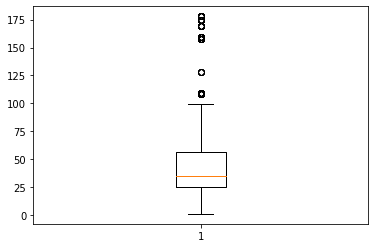

In [15]:
plt.boxplot(data['amounts'])
plt.show()

In [16]:
# 自定义函数用于将数据中的异常值替换为缺失值
def replace(x):
    import numpy as np
    QU = x.quantile(0.75)
    QL = x.quantile(0.25)
    IQR = QU -QL
    x[(x > (QU + 1.5*IQR)) | (x < (QL - 1.5*IQR))] = np.nan
    return x

In [17]:
data['amounts'].isnull().sum()

0

In [18]:
replace(data['amounts']).isnull().sum()

<ipython-input-16-b676530bc5d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[(x > (QU + 1.5*IQR)) | (x < (QL - 1.5*IQR))] = np.nan


173

## 标准化数据

In [19]:
import pandas as pd

In [20]:
data = pd.read_excel('data/meal_order_detail.xlsx')
print(data.head(3))
data[['counts', 'amounts']].describe()

   detail_id  order_id  dishes_id  logicprn_name  parent_class_name  \
0       2956       417     610062            NaN                NaN   
1       2958       417     609957            NaN                NaN   
2       2961       417     609950            NaN                NaN   

         dishes_name  itemis_add  counts  amounts  cost    place_order_time  \
0               蒜蓉生蚝           0       1       49   NaN 2016-08-01 11:05:36   
1  蒙古烤羊腿\r\n\r\n\r\n           0       1       48   NaN 2016-08-01 11:07:07   
2               大蒜苋菜           0       1       30   NaN 2016-08-01 11:07:40   

   discount_amt  discount_reason  kick_back  add_inprice  add_info  bar_code  \
0           NaN              NaN        NaN            0       NaN       NaN   
1           NaN              NaN        NaN            0       NaN       NaN   
2           NaN              NaN        NaN            0       NaN       NaN   

       picture_file  emp_id  
0  caipu/104001.jpg    1442  
1  caipu/202003.j

,counts,amounts
count,2779.000000,2779.000000
mean,1.111191,45.337172
std,0.625428,36.808550
min,1.000000,1.000000
25%,1.000000,25.000000
50%,1.000000,35.000000
75%,1.000000,56.000000
max,10.000000,178.000000


In [21]:
def min_max_scaler(x):
    return (x-x.min())/(x.max()-x.min())

def stander_scaler(x):
    return (x-x.mean())/x.std()

def decimal_scaler(x):
    import numpy as np
    return x/10**(np.ceil(np.log10(x.abs().max())))

In [22]:
data[['counts', 'amounts']].agg([min_max_scaler, stander_scaler, decimal_scaler])

counts                                      amounts  \
     min_max_scaler stander_scaler decimal_scaler min_max_scaler   
0               0.0      -0.177784            0.1       0.271186   
1               0.0      -0.177784            0.1       0.265537   
2               0.0      -0.177784            0.1       0.163842   
3               0.0      -0.177784            0.1       0.135593   
4               0.0      -0.177784            0.1       0.067797   
...             ...            ...            ...            ...   
2774            0.0      -0.177784            0.1       0.050847   
2775            0.0      -0.177784            0.1       0.220339   
2776            0.0      -0.177784            0.1       0.067797   
2777            0.0      -0.177784            0.1       0.163842   
2778            0.0      -0.177784            0.1       0.180791   

                                    
     stander_scaler decimal_scaler  
0          0.099510          0.049  
1          0.072343          0.048  
2         -0.416674          0.030  
3         -0.552512          0.025  
4         -0.878523          0.013  
...             ...            ...  
2774      -0.960026          0.010  
2775      -0.144998          0.040  
2776      -0.878523          0.013  
2777      -0.416674          0.030  
2778      -0.335171          0.033  

[2779 rows x 6 columns]

## 转换数据

In [23]:
import pandas as pd
data = pd.read_excel('data/meal_order_detail.xlsx')
data.head(3)

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿\r\n\r\n\r\n,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442


#### 哑变量处理

In [24]:
pd.get_dummies(data[['amounts', 'dishes_name']])

,amounts,dishes_name_ 42度海之蓝,dishes_name_ 北冰洋汽水,dishes_name_38度剑南春,dishes_name_50度古井贡酒,dishes_name_52度泸州老窖,dishes_name_53度茅台,dishes_name_一品香酥藕,dishes_name_三丝鳝鱼,dishes_name_三色凉拌手撕兔,...,dishes_name_香辣腐乳炒虾,dishes_name_香酥两吃大虾,dishes_name_鱼香肉丝拌面,dishes_name_鲜美鳝鱼,dishes_name_鸡蛋、肉末肠粉,dishes_name_麻辣小龙虾,dishes_name_黄尾袋鼠西拉子红葡萄酒,dishes_name_黄油曲奇饼干,dishes_name_黄花菜炒木耳,dishes_name_黑米恋上葡萄
0,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2775,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2776,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2777,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data['dishes_name'].value_counts()

白饭/大碗          92
凉拌菠菜           77
谷稻小庄           72
麻辣小龙虾          65
白饭/小碗          60
               ..
冰镇花螺            1
百里香奶油烤紅酒牛肉      1
红酒土豆烧鸭腿\r\n     1
照烧鸡腿\r\n        1
五香酱驴肉\r\n       1
Name: dishes_name, Length: 154, dtype: int64

#### 离散化连续型数据

In [26]:
pd.cut(data['amounts'], 5)

0        (36.4, 71.8]
1        (36.4, 71.8]
2       (0.823, 36.4]
3       (0.823, 36.4]
4       (0.823, 36.4]
            ...      
2774    (0.823, 36.4]
2775     (36.4, 71.8]
2776    (0.823, 36.4]
2777    (0.823, 36.4]
2778    (0.823, 36.4]
Name: amounts, Length: 2779, dtype: category
Categories (5, interval[float64]): [(0.823, 36.4] < (36.4, 71.8] < (71.8, 107.2] < (107.2, 142.6] < (142.6, 178.0]]